# Our Awesome Machine Learning Recycling Bot

In [2]:
# Imports
import matplotlib.pyplot as plt # math plotting library
%matplotlib inline 
import numpy as np
from os import listdir 
import random
from PIL import Image
import cv2  # openCV, computer vision library
from sklearn import svm  # our machine learning algorithm
from sklearn.metrics import accuracy_score  

/miniconda3/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/computerscience/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [11]:
# load images
loaded_images = list()

for filename in listdir('downsized_data'):
        img_data = cv2.imread('downsized_data/' + filename, cv2.IMREAD_UNCHANGED)
        img_shape = img_data.shape
        flat_img_data = img_data.flatten()
        loaded_images.append((flat_img_data, filename))
        
loaded_images = np.array(loaded_images)

In [12]:
# create train and test data
random.shuffle(loaded_images)

rec_types = ['cardboard', 'glass', 'trash', 'plastic', 'paper', 'metal']

def get_rec_type( filename ):
    for r in rec_types:
        if r in filename:
            return r

len_train_data = int(0.8* len(loaded_images))

x_train = np.array([ x for (x,y) in loaded_images[:len_train_data]])
x_test = np.array([ x for (x,y) in loaded_images[len_train_data:]])
           
y_test = np.array([ get_rec_type(y) for (x,y) in loaded_images[len_train_data:]])
y_train = np.array([ get_rec_type(y) for (x,y) in loaded_images[:len_train_data]])

In [13]:
print(len(x_train))
print(x_train[0].shape)
print(len(y_train))
print(y_train[0])

2021
(23256,)
2021
metal


In [1]:
# show image
rand_num = random.randint(1,len(x_test))
img = x_test[rand_num]
img = img.reshape(img_shape)
plt.imshow(img)
plt.show()
print(img.shape)

NameError: name 'random' is not defined

In [15]:
# create classifier
classifier = svm.SVC(gamma=0.001, kernel='linear')
#fit to the training data
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
# create prediction data
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [17]:
# calculate accuracy
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

print("accuracy on training data: " + str(acc_train))
print("accuracy on test data: " + str(acc_test))

accuracy on training data: 0.9995051954477981
accuracy on test data: 0.7035573122529645


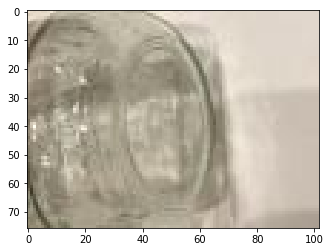

prediction is: glass


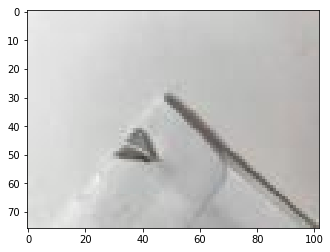

prediction is: plastic


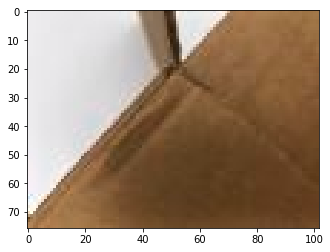

prediction is: cardboard


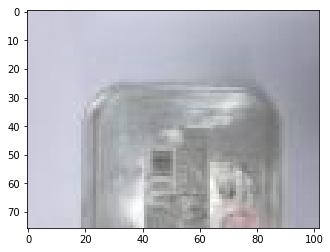

prediction is: plastic


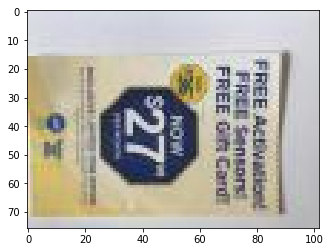

prediction is: paper


In [19]:
for i in range(5):
    rand_num = random.randint(1,len(x_test))
    img = x_test[rand_num].reshape(img_shape)
    plt.imshow(img)
    plt.show()
    print("prediction is: " + pred_test[rand_num])